In [55]:
## Import modules
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [56]:
data = pd.read_csv("p2p_use/p2p_data.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 28784 rows and 22 columns.
- Column names:  ['annual_inc', 'bc_util', 'chargeoff_within_12_mths', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'num_accts_ever_120_pd', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bc_limit', 'avg_cur_bal', 'pct_tl_nvr_dlq', 'revol_bal', 'total_acc', 'int_rate', 'verification_status_B', 'verification_status_C', 'home_ownership_B', 'home_ownership_C', 'term', 'TARGET']


In [57]:
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3)

In [58]:
X.head(5)

,annual_inc,bc_util,chargeoff_within_12_mths,dti,inq_last_6mths,mths_since_last_delinq,num_accts_ever_120_pd,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,...,avg_cur_bal,pct_tl_nvr_dlq,revol_bal,total_acc,int_rate,verification_status_B,verification_status_C,home_ownership_B,home_ownership_C,term
0,53000.0,88.8,0,25.25,0,11,0,0,0,132074,...,14564,100.0,13780,17,20.49,1,0,0,0,1
1,60000.0,94.4,0,25.88,0,20,1,0,0,68761,...,5565,87.5,7378,16,12.29,0,0,1,0,0
2,125000.0,82.5,0,10.93,1,77,0,0,0,229006,...,14929,100.0,14171,41,7.89,0,0,1,0,0
3,90000.0,77.6,0,22.75,0,79,0,0,0,248018,...,12054,100.0,34073,41,17.57,0,1,0,1,1
4,76863.0,43.3,0,19.53,1,34,2,0,0,40792,...,3816,77.8,1040,20,9.17,0,0,0,1,0


In [59]:
y.head(5)

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HQ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
Z_train = pca.transform(X_train)
print("- Shape of transformed data: ", Z_train.shape)

Z_test = pca.transform(X_test)
print("- Shape of transformed data: ", Z_test.shape)

- Shape of transformed data:  (20148, 21)
- Shape of transformed data:  (8636, 21)


In [63]:
num_components = pca.n_components_
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)

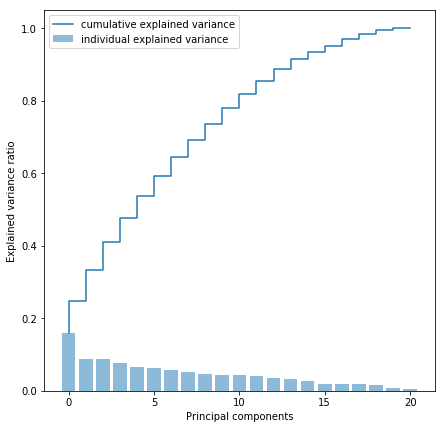

In [64]:
plt.figure(num=1, figsize=(7, 7))
plt.bar(range(num_components), exp_var, alpha=0.5, label='individual explained variance')
plt.step(range(num_components), cum_exp_var, label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

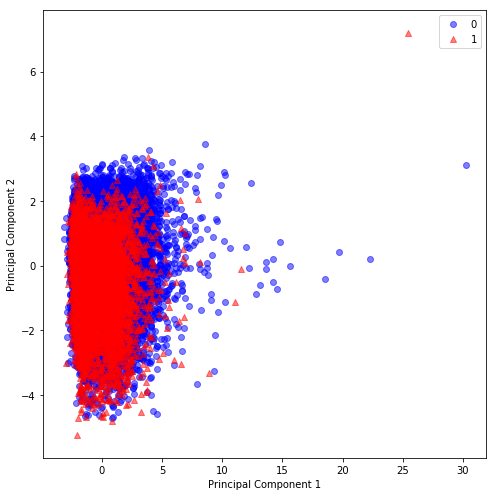

In [65]:
plt.figure(num=2, figsize=(7, 7))
for label, color, marker in zip((0, 1), ('blue', 'red'), ('o', '^')):
    plt.scatter(Z_train[y_train == label, 0], Z_train[y_train == label, 1],
                label=label, color=color, marker=marker, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

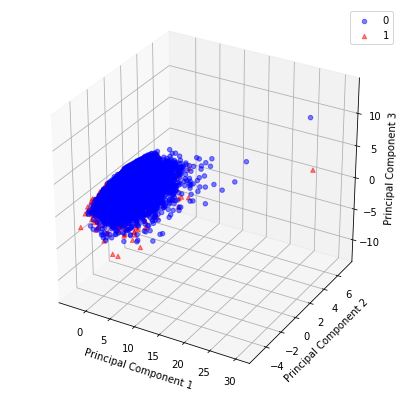

In [66]:
fig = plt.figure(num=3, figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for label, color, marker in zip((0, 1), ('blue', 'red'), ('o', '^')):
    ax.scatter(Z_train[y_train == label, 0], Z_train[y_train == label, 1],
               Z_train[y_train == label, 2], label=label, color=color,
               marker=marker, alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(loc='best')
plt.show(fig)

In [67]:
Z_sub_train = pd.DataFrame(Z_train[:,:15])
Z_sub_test = pd.DataFrame(Z_test[:,:15])

In [68]:
## Build LR model 
log_Z = LogisticRegression()
log_Z.fit(Z_sub_train, y_train)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

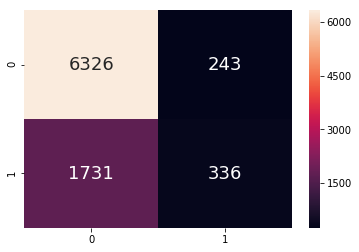

In [69]:
## Predict & calculate score 
pred_score_Z = log_Z.score(Z_sub_test, y_test)
pred_Z = log_Z.predict(Z_sub_test)

cm_test = confusion_matrix(y_test, pred_Z)
cm_test = pd.DataFrame(cm_test, columns=[0, 1])
sns.heatmap(data=cm_test,fmt='g', annot=True, annot_kws={'size': 18})

In [70]:
log_ori = LogisticRegression()
log_ori.fit(X_train, y_train)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

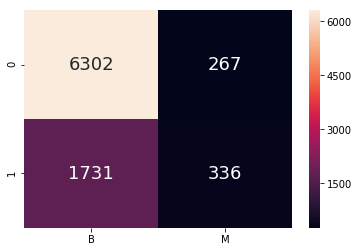

In [71]:
pred_score_ori = log_ori.score(X_test, y_test)
pred_ori = log_ori.predict(X_test)
confusion_matrix(y_test, pred_ori)

cm_test = confusion_matrix(y_test, pred_ori)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test,fmt='g', annot=True, annot_kws={'size': 18})